In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import scipy.stats as stats

In [17]:
def preprocess(file_name):
    results = []
    with open(file_name) as csvfile:
        wine_reader = csv.reader(csvfile, dialect="excel", delimiter=';')
        for row in wine_reader:
            results.append(row)
    name_features = results[0]
    #print(name_features)
    parsed_results = []
    for row in results[1:]:
        new_row = []
        for num in row:
            new_row.append(float(num))
        parsed_results.append(new_row)
    parsed_results = np.array(parsed_results)
    n_instances = parsed_results.shape[0]
    n_features = parsed_results.shape[1] - 1
    labels = parsed_results[:, n_features]
    instances = parsed_results[:, : n_features]
    return instances, labels
white_instances, white_labels = preprocess('winequality-white.csv')
red_instances, red_labels = preprocess('winequality-red.csv')
feature_names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                 "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

### Visualise distribution of scores for White and Red Wine, respectively

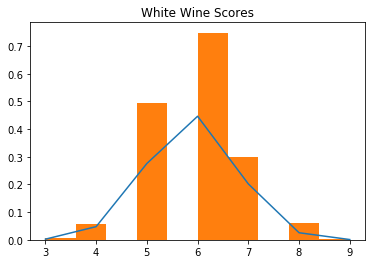

In [18]:
def visualise(labels, title):
    sorted_data = sorted(labels)
    fit = stats.norm.pdf(sorted_data, np.mean(sorted_data), np.std(sorted_data))
    plt.plot(sorted_data, fit)
    plt.hist(sorted_data, normed=True)
    plt.title(title)
    plt.show()
visualise(white_labels, "White Wine Scores")

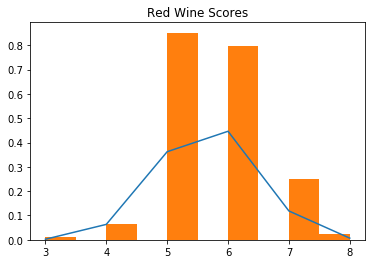

In [19]:
visualise(red_labels, "Red Wine Scores")

### Visualise distribution of all features for White and Red Wine, respectively

In [35]:
def visualise_features(vec):
    for i in range(len(feature_names)):
        visualise([row[i] for row in vec], feature_names[i])

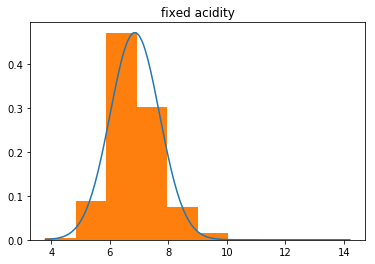

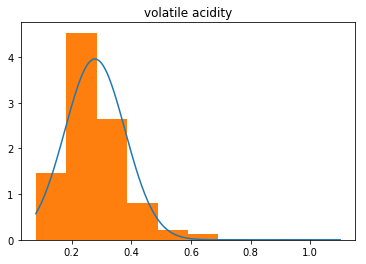

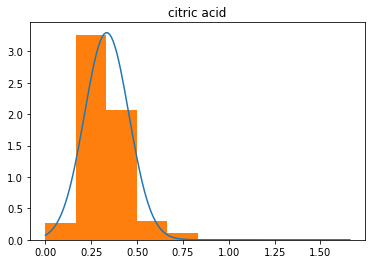

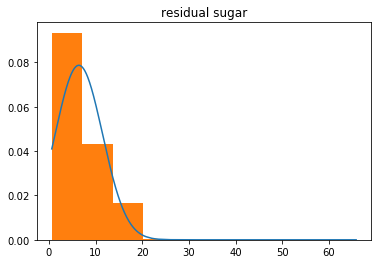

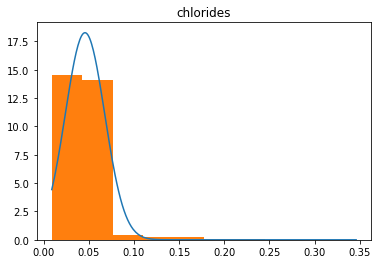

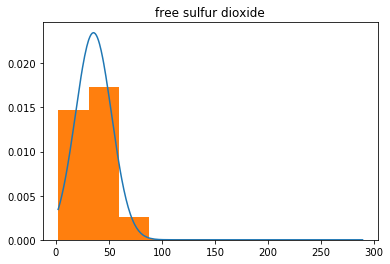

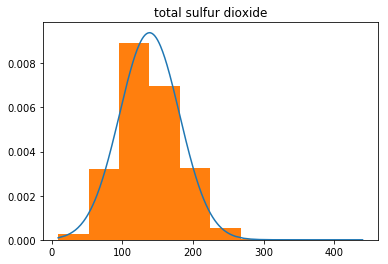

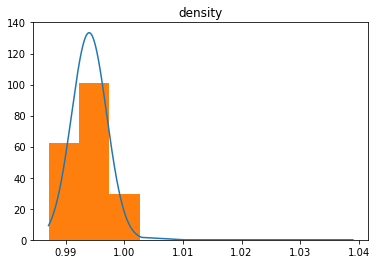

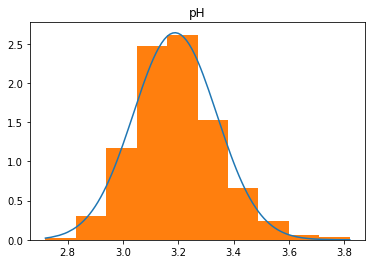

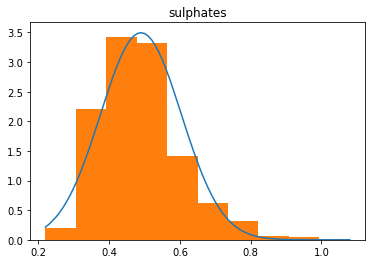

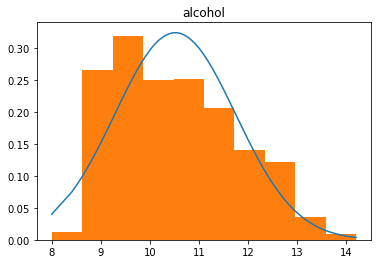

In [36]:
visualise_features(white_instances)

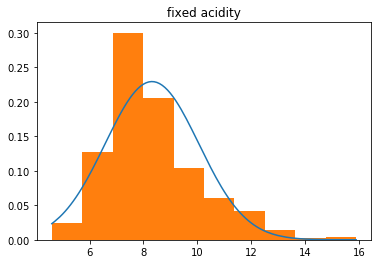

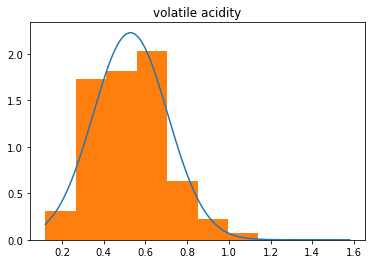

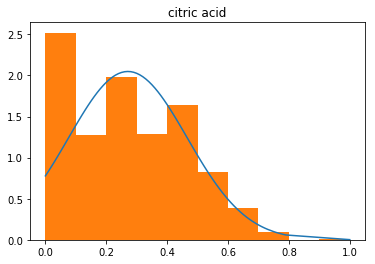

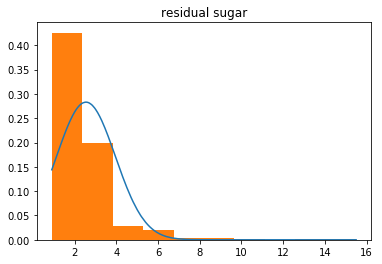

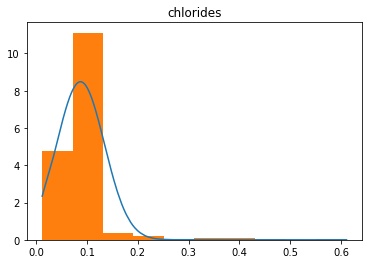

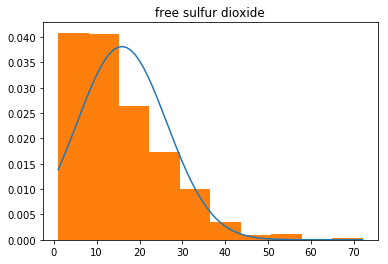

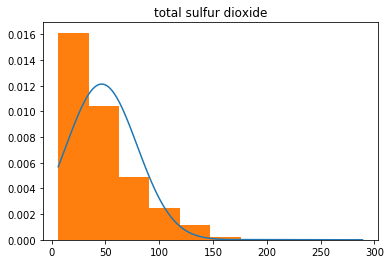

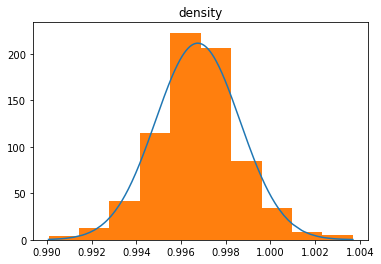

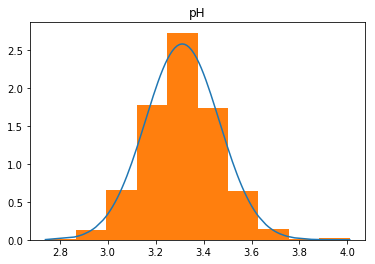

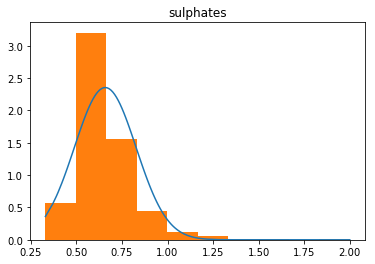

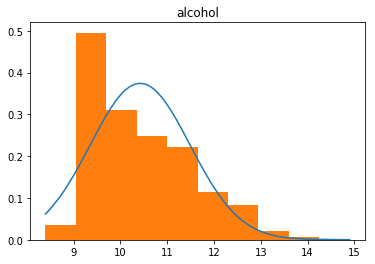

In [37]:
visualise_features(red_instances)

### Transform classes

In [23]:
# 2 classes 0 and 1 st 0 = bad wine, 1 = good wine
transformed_white_labels = np.array([0 if num <6 else 1 for num in white_labels])
transformed_red_labels = np.array([0 if num <6 else 1 for num in red_labels])

In [42]:
def three_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score <= 6:
            transformed.append("medium")
        else:
            transformed.append("good")
    return np.array(transformed)
def four_classes(wine_labels):
    transformed = []
    for score in wine_labels:
        if score <= 4:
            transformed.append("bad")
        elif score == 5:
            transformed.append("medium low")
        elif score == 6:
            transformed.append("medium high")
        else:
            transformed.append("good")
    return np.array(transformed)

In [46]:
white_three_classes = three_classes(white_labels)
red_three_classes = three_classes(red_labels)
white_four_classes = four_classes(white_labels)
red_four_classes = four_classes(red_labels)